Image Classification Model Evaluation

Models:

    model_batchnorm.keras
    model_dropout.keras
    model_relu.keras
    model_sigmoid.keras
    model_xavier.keras

Import Necessary Libraries

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # '0' = all messages, '1' = INFO, '2' = WARNING, '3' = ERROR
import numpy as np
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.saving import load_model
import matplotlib.image as mpimg
import random

Load the Test Data

In [3]:
# Path to the test dataset directory
test_dir = 'data/test'  # Replace with your actual test dataset path

# Image dimensions
IMG_HEIGHT = 100
IMG_WIDTH = 100

# Data Preprocessing for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=1,  # Use batch size of 1 for easy indexing
    class_mode='categorical',
    shuffle=False  # Do not shuffle to maintain order
)


Found 359 images belonging to 36 classes.


Load the Saved Models

In [4]:
# Load the models
model_batchnorm = load_model('model_batchnorm.keras')
model_dropout = load_model('model_dropout.keras')
model_relu = load_model('model_relu.keras')
model_sigmoid = load_model('model_sigmoid.keras')
model_xavier = load_model('model_xavier.keras')

I0000 00:00:1728339064.416131  142594 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-08 03:11:04.418782: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Evaluate Models on Test Data

In [5]:
# List to hold model names and their corresponding objects
models = [
    ('Batch Normalization', model_batchnorm),
    ('Dropout', model_dropout),
    ('ReLU Activation', model_relu),
    ('Sigmoid Activation', model_sigmoid),
    ('Xavier Initialization', model_xavier)
]

# Dictionary to hold test accuracies
test_accuracies = {}

# Evaluate each model
for model_name, model in models:
    # Reset the test generator before each evaluation
    test_generator.reset()
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples, verbose=0)
    print(f'{model_name} Model Test Accuracy: {test_acc:.2f}')
    # Store the test accuracy
    test_accuracies[model_name] = test_acc

/usr/local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Batch Normalization Model Test Accuracy: 0.92
Dropout Model Test Accuracy: 0.69
ReLU Activation Model Test Accuracy: 0.92
Sigmoid Activation Model Test Accuracy: 0.03
Xavier Initialization Model Test Accuracy: 0.92


Make Predictions with Each Model

In [6]:
# Dictionary to hold predictions
predictions = {}

# Get predictions for each model
for model_name, model in models:
    # Reset the test generator before predictions
    test_generator.reset()
    # Predict on test data
    preds = model.predict(test_generator, steps=test_generator.samples, verbose=1)
    # Store predictions
    predictions[model_name] = preds

359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step


Prepare Labels and Class Indices

In [7]:
# Get the true labels
true_classes = test_generator.classes
class_indices = test_generator.class_indices

# Invert the class_indices to get a mapping from class index to class label
class_labels = list(class_indices.keys())

Function to Display Predictions

In [8]:
def display_prediction(model_name, preds, num_samples=5):
    """
    Displays sample test images with predictions.

    Parameters:
    - model_name (str): Name of the model.
    - preds (numpy array): Predictions from the model.
    - num_samples (int): Number of samples to display.
    """
    predicted_classes = np.argmax(preds, axis=1)
    indices = random.sample(range(len(test_generator.filenames)), num_samples)
    for idx in indices:
        img_path = os.path.join(test_dir, test_generator.filenames[idx])
        img = mpimg.imread(img_path)
        true_label = class_labels[true_classes[idx]]
        pred_label = class_labels[predicted_classes[idx]]
        if pred_label == true_label:
            color = 'green'
            title = f"Correct Prediction: {pred_label}"
        else:
            color = 'red'
            title = f"Incorrect Prediction: {pred_label}\nTrue Label: {true_label}"
        plt.figure(figsize=(4,4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, color=color)
        plt.suptitle(f"Model: {model_name}", y=0.95, fontsize=12)
        plt.show()


Display Predictions for Each Model

Batch Normalization Model

Displaying predictions for the Batch Normalization Model:


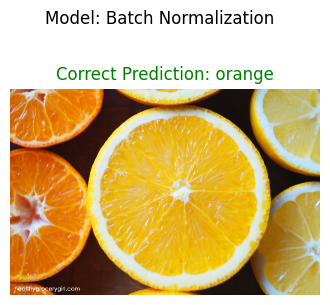

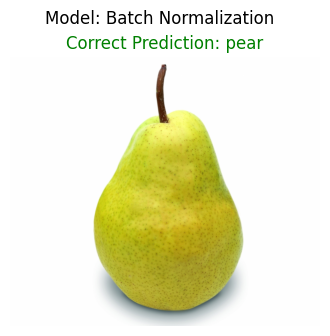

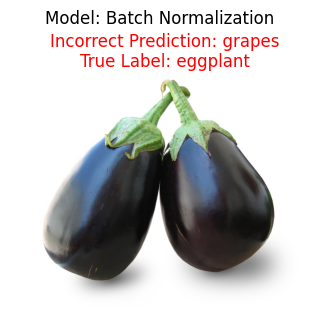

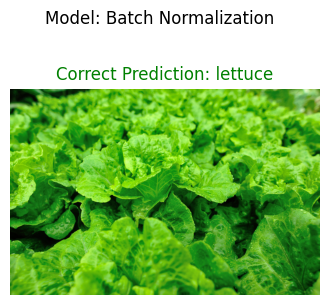

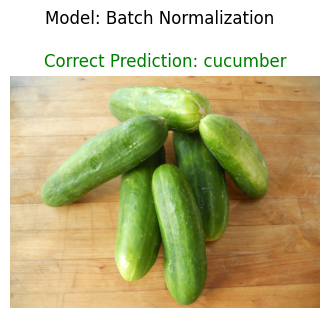

In [9]:
print("Displaying predictions for the Batch Normalization Model:")
display_prediction("Batch Normalization", predictions["Batch Normalization"], num_samples=5)

Dropout Model

Displaying predictions for the Dropout Model:


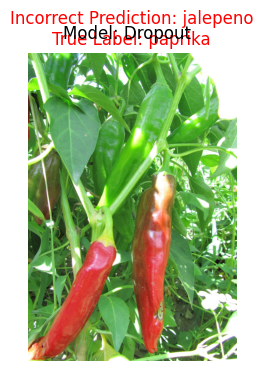

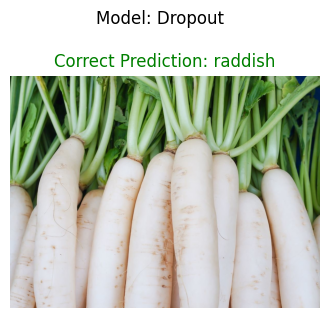

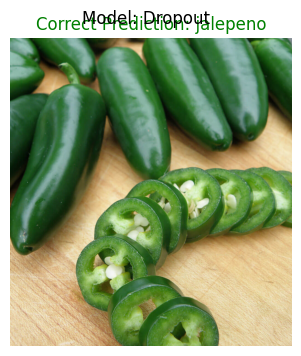

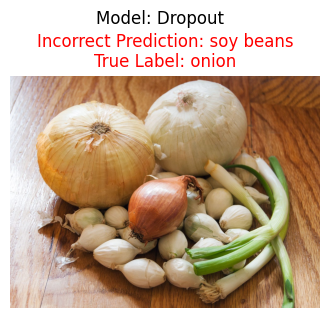

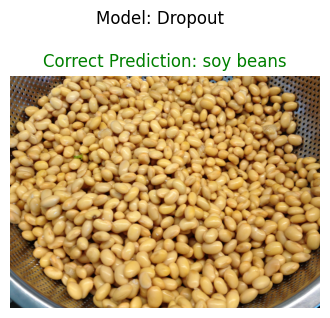

In [10]:
print("Displaying predictions for the Dropout Model:")
display_prediction("Dropout", predictions["Dropout"], num_samples=5)


ReLU Activation Model

Displaying predictions for the ReLU Activation Model:


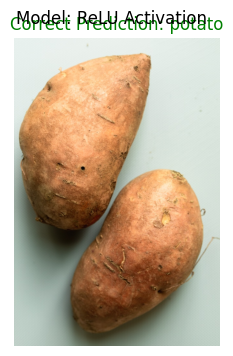

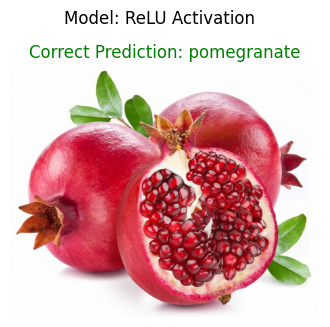

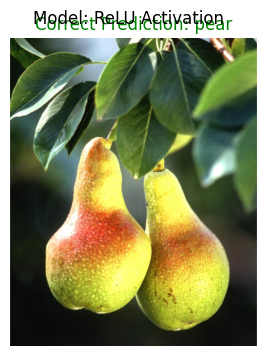

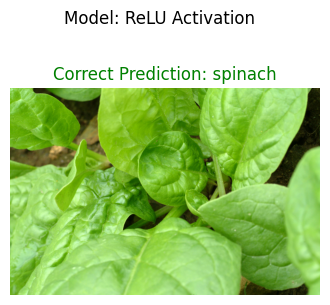

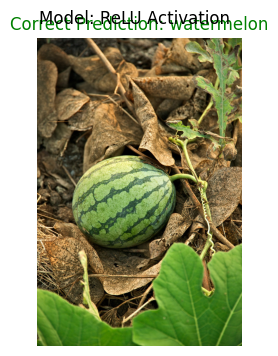

In [11]:
print("Displaying predictions for the ReLU Activation Model:")
display_prediction("ReLU Activation", predictions["ReLU Activation"], num_samples=5)

Sigmoid Activation Model

Displaying predictions for the Sigmoid Activation Model:


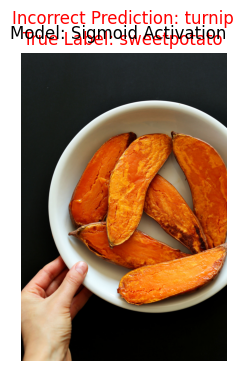

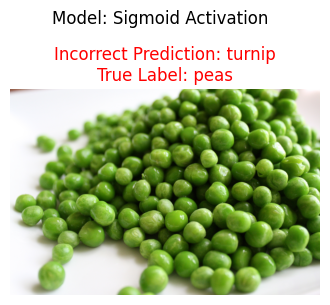

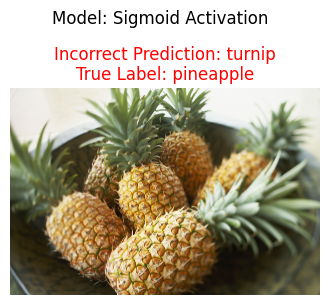

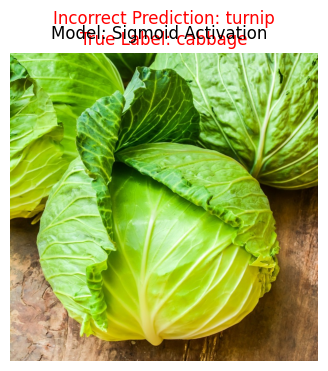

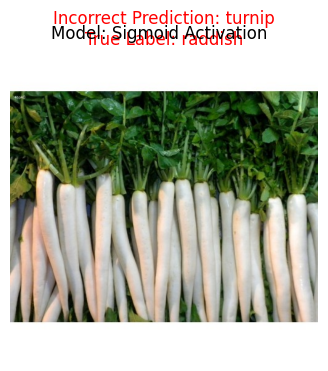

In [12]:
print("Displaying predictions for the Sigmoid Activation Model:")
display_prediction("Sigmoid Activation", predictions["Sigmoid Activation"], num_samples=5)

Xavier Initialization Model

Displaying predictions for the Xavier Initialization Model:


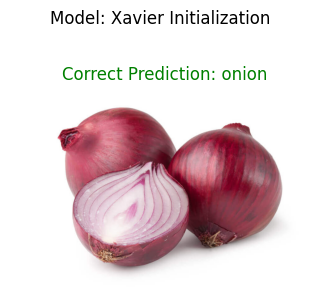

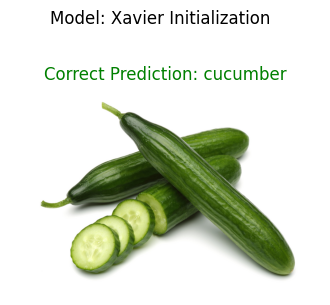

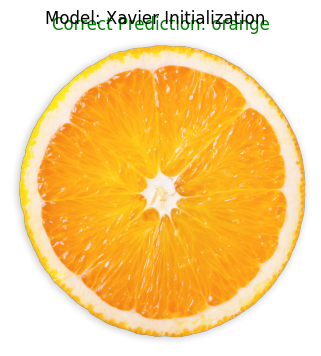

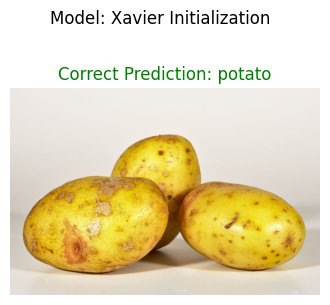

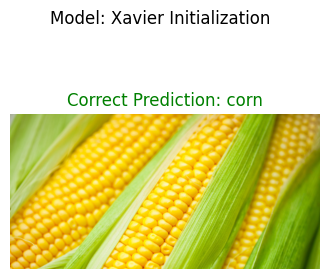

In [13]:
print("Displaying predictions for the Xavier Initialization Model:")
display_prediction("Xavier Initialization", predictions["Xavier Initialization"], num_samples=5)

Plot Overall Test Accuracy

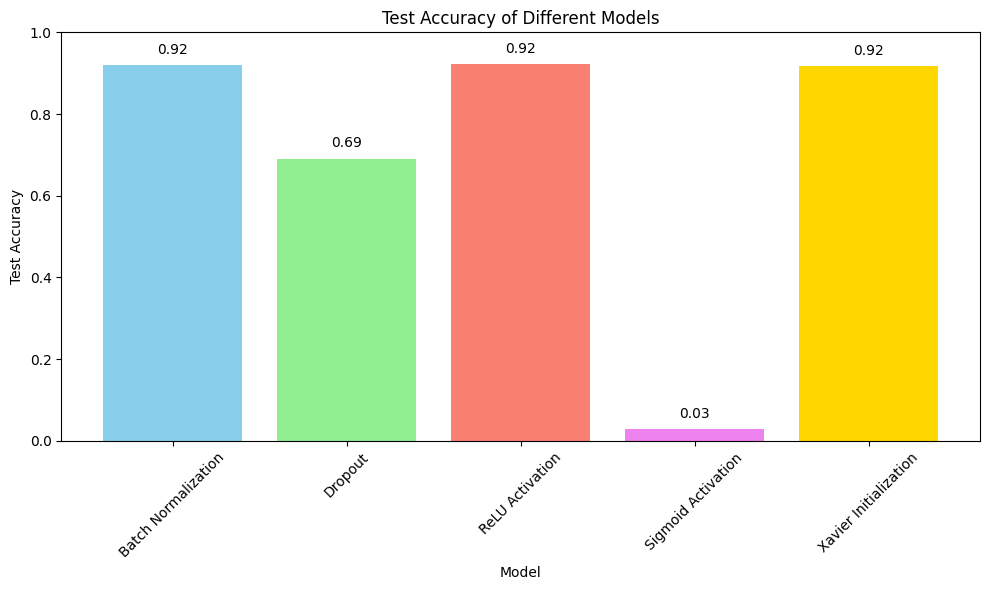

In [14]:
# Plotting test accuracies of all models
model_names = list(test_accuracies.keys())
accuracy_values = list(test_accuracies.values())

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracy_values, color=['skyblue', 'lightgreen', 'salmon', 'violet', 'gold'])
plt.title('Test Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

# Annotate bars with accuracy values
for bar, accuracy in zip(bars, accuracy_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
